# Sarah's Red Wine Ensemble Machine Learning
**Author:** Sarah Howard 

**Date:** April 13. 2025

**Objective:** To showcase how ensemble models can be applied in machine learning to predict quality of wine.

## Introduction

Using the UCI Wine Quality Dataset for red wine, we are going to use ensemble models to predict the quality of red wine.

## Imports
In the code cell below, import the necessary Python libraries for this notebook. 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

## Section 1. Load and Inspect the Data

### Load the SCI Red Wine dataset and confirm it’s structured correctly.

In [69]:
# Load the dataset (download from UCI and save in the same folder)
df = pd.read_csv("winequality-red.csv", sep=";")

# Display structure and first few rows
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [70]:
# Load spiral dataset
spiral = pd.read_csv("winequality-red.csv", sep=";")

# Display basic information
spiral.info()

# Display first few rows
print(spiral.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00 

## Section 2. Prepare the Data

### Check for missing values

In [71]:
# Check for missing values

df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Simplify the target variable (quality) into 3 categories

In [72]:
# This function will be used to create the quality_label column
def quality_to_label(q):
    if q <= 4:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"
    
# Call the apply() method on the quality column to create the new quality_label column
df["quality_label"] = df["quality"].apply(quality_to_label)

# Then, create a numeric column for modeling: 0 = low, 1 = medium, 2 = high
def quality_to_number(q):
    if q <= 4:
        return 0
    elif q <= 6:
        return 1
    else:
        return 2
    
df["quality_numeric"] = df["quality"].apply(quality_to_number)

### Comparison of spirals for different sets of features

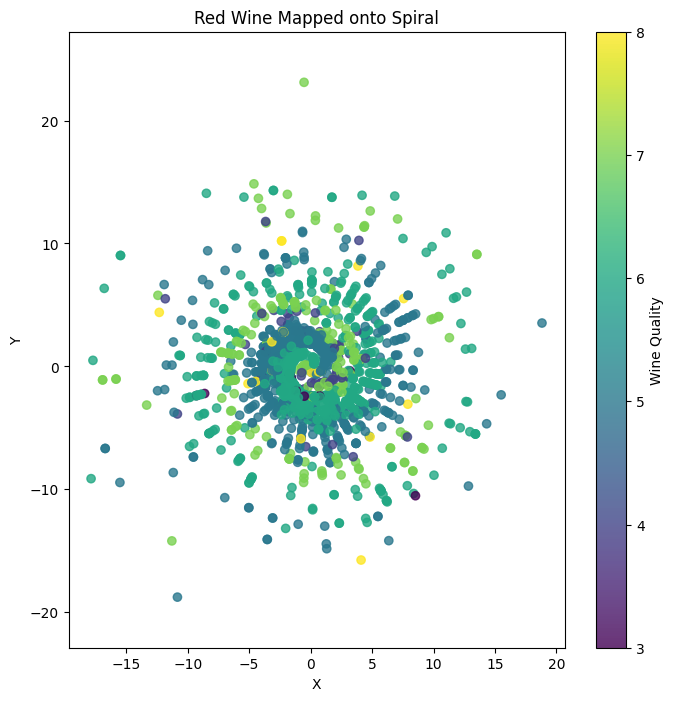

In [73]:

scaler = MinMaxScaler()

features = df[['fixed acidity', 'volatile acidity', 'citric acid']]
scaled = scaler.fit_transform(features)

# Extract individual normalized features
fixed_acidity = scaled[:, 0] 
volatile_acidity = scaled[:, 1]    
citric_acid = scaled[:, 2]

# Use fixed_acidity to set theta, citric_acid to influence r
theta = fixed_acidity * 6 * np.pi    # wraps the spiral a few times
r = theta * (0.5 + citric_acid)      # adjust radius based on citric acid

arms = 3
arm_indices = df['quality'] % arms    
offsets = arm_indices * (2 * np.pi / arms)
theta += offsets

# Convert to Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)

# Plot, coloring by wine quality
plt.figure(figsize=(8, 8))
scatter = plt.scatter(x, y, c=df['quality'], cmap='viridis', alpha=0.8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Red Wine Mapped onto Spiral')
plt.colorbar(scatter, label='Wine Quality')
plt.axis('equal')
plt.show()

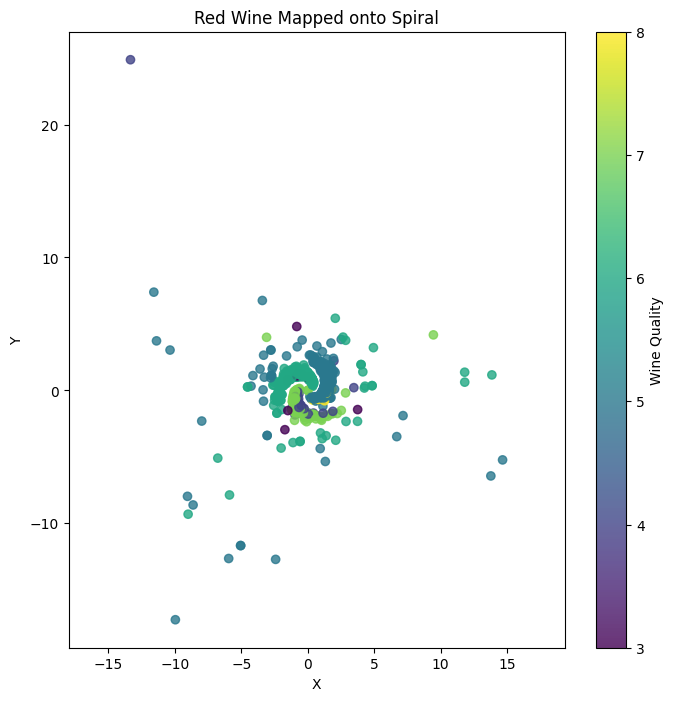

In [74]:
scaler = MinMaxScaler()

features = df[['chlorides', 'pH', 'sulphates']]
scaled = scaler.fit_transform(features)

# Extract individual normalized features
chlorides = scaled[:, 0] 
pH = scaled[:, 1]    
sulphates = scaled[:, 2]

# Use chlorides to set theta, sulphates to influence r
theta = chlorides* 6 * np.pi    # wraps the spiral a few times
r = theta * (0.5 + sulphates)      # adjust radius based on sulphates

arms = 3
arm_indices = df['quality'] % arms    
offsets = arm_indices * (2 * np.pi / arms)
theta += offsets

# Convert to Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)

# Plot, coloring by wine quality
plt.figure(figsize=(8, 8))
scatter = plt.scatter(x, y, c=df['quality'], cmap='viridis', alpha=0.8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Red Wine Mapped onto Spiral')
plt.colorbar(scatter, label='Wine Quality')
plt.axis('equal')
plt.show()

### Reflection:
For the spirals, I tried selecting different groups of features that I thought could be related to see how they compared.

The first group - fixed acidity, volatile acidity, and citric acid - produced a spiral that was more spread out. Based on this, it appears there may not be a high correlation between the 3 features.  

The second group - chloride, pH, and sulphates - created a much tighter spiral.  This could indicate there was less variance in the values or it could be a sign that they have a closer correlation.

## Section 3. Feature Selection and Justification

In [75]:
# Define input features (X) and target (y)
# Features: all columns except 'quality' and 'quality_label' and 'quality_numberic' - drop these from the input array
# Target: quality_label (the new column we just created)
X = df.drop(columns=["quality", "quality_label", "quality_numeric"])  # Features
y = df["quality_numeric"]  # Target

### Reflection:
For the analysis, all the features (fixed acidity, volatile acidity, citric acide, residual sugar, chlorides, free sulphur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol) are being considered to see if the quality can be determined.

## Section 4. Split the Data into Train and Test

In [76]:
# Train/test split (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Section 5.  Evaluate Model Performance

### Random Forest (100)

In [77]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test, RF_results):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")

    print(f"\n{name} Results")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Train F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f}")

    RF_results.append(
        {
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "Train F1": train_f1,
            "Test F1": test_f1,
        }
    )

RF_results = []

evaluate_model(
    "Random Forest (100)",
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train,
    y_train,
    X_test,
    y_test,
    results,
)


Random Forest (100) Results
Confusion Matrix (Test):
[[  0  13   0]
 [  0 256   8]
 [  0  15  28]]
Train Accuracy: 1.0000, Test Accuracy: 0.8875
Train F1 Score: 1.0000, Test F1 Score: 0.8661


### Bagging (100)

In [78]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test, B_results):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")

    print(f"\n{name} Results")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Train F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f}")

    B_results.append(
        {
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "Train F1": train_f1,
            "Test F1": test_f1,
        }
    )

B_results = []

evaluate_model(
    "Bagging (DT, 100)",
    BaggingClassifier(
        estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42
    ),
    X_train,
    y_train,
    X_test,
    y_test,
    results,
)


Bagging (DT, 100) Results
Confusion Matrix (Test):
[[  0  13   0]
 [  0 252  12]
 [  0  12  31]]
Train Accuracy: 1.0000, Test Accuracy: 0.8844
Train F1 Score: 1.0000, Test F1 Score: 0.8655


## Section 6. Compare Results 

In [83]:
# Create a table of results 
results_df = pd.DataFrame(results)
results_df["Accuracy Gap"] = results_df["Train Accuracy"] - results_df["Test Accuracy"]
results_df["F1 Gap"] = results_df["Train F1"] - results_df["Test F1"]
results_df = results_df.drop_duplicates(subset="Model", keep="last")

print("\nSummary of All Models:")
display(results_df)


Summary of All Models:


,Model,Train Accuracy,Test Accuracy,Train F1,Test F1,Accuracy Gap,F1 Gap
5,Random Forest (100),1.0,0.887500,1.0,0.866056,0.112500,0.133944
6,"Bagging (DT, 100)",1.0,0.884375,1.0,0.865452,0.115625,0.134548


## Section 7. Conclusions and Insights

The Random Forest (100) and Bagging (100) had the best scores for accuracy and F1 on the training models and on the test models.  These models appear to be the best based on those results.  

The Random Forest (200) also had high accuracy and F1 scores on the training and test data and had a lower accuracy gap than either Random Forest (100) or Bagging (100). This is also a good choice for a model based on the below results.

MLP Classifier had fairly consistent results between the training and test models; however, its training score was only slightly higher than AdaBoost and its F1 scores were lower than Adaboost.

AdaBoost (100 and 200) had consistent results between the training and test models; however, it had the low scores on both the training and test data.

#### Comparison of different models

| Model | Acc Train | F1 Train |Acc Test | F1 Test |Acc Gap | F1 Gap |
|:---|:---|:---|:---|:---|:---|:---|
|Random Forest (100)|100.0|100.0|88.75|86.61|11.25|13.39|
|Random Forest (200)|97.58|97.45|88.13|85.96|9.45|
|AdaBoost (100)|83.42|82.09|82.50|81.58| | |
|AdaBoost (200)|83.97|81.60|85.63|83.30| | |
|Gradient Boosting (100)|96.01|95.84|85.63|84.11|10.39|
|Voting (DT+SVM+NN)|92.26|90.61|86.56|84.34| | |
|Voting (RF+LR+KNN)| | |83.8|78.7|7.0|9.6|
|Bagging(100)|100.0|100.0|88.44|86.55|11.56|13.45|
|MLP Classifier|85.14|81.41|84.38|80.73| | |


#### Credits for models
Random Forest (200) and Gradient Boosting (100) - Results by Clayton Seabaugh - https://github.com/ClaytonSeabaughGH/applied-ml-seabaugh/blob/main/lab05/ensemble-seabaugh.ipynb

AdaBoost (100) - Results by Terrence Konkin - https://github.com/TKonkin/applied-ml-terry/blob/main/lab05/ensemble-terry.ipynb

AdaBoost (200) - Results by Priyanka Naskar - https://github.com/Priyankanaskar/applied-ml-priyanka/tree/main/lab05

Voting (DT+SVM+NN) - Results by Derek Fintel - https://github.com/dfintel25/applied-ml-derekfintel/blob/main/lab05/ensemble-fintel.ipynb

Voting (RF+LR+KNN) - Results by Jason Ballard - https://github.com/JBtallgrass/applied-ml-jballard/blob/main/lab05/ensemble-jballard.ipynb

MLP Classifier - Results by Nolan Moss - https://github.com/Crusoe22/applied-ml-moss/blob/main/lab05/ensemble-moss.ipynb